In [18]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
import utils.plot_utils as plu
from tqdm import tqdm
import numpy as np
import pickle
from signal_processing import sr_processing as sr
from hu_classes.hu_dataloader import matrics_loader
import signal_processing.subsetter as sset
import numpy as np
from utils import plot_utils as plu
import utils.data_extraction as datrac
import pandas as pd
import utils.summarize as summer 

In [21]:
for i in os.listdir('/home/tony/Halluci-Nations/scratch/'):
    print(i)

ecephys_717036_2024-06-06_12-32-42_nwb_2025-08-03_21-11-22
ecephys_717033_2024-06-05_12-36-57_nwb_2025-08-03_21-11-22
ecephys_717033_2024-06-04_13-01-40_nwb_2025-08-03_21-11-22
ecephys_730049_2024-06-14_12-07-57_nwb_2025-08-03_21-11-22
ecephys_730049_2024-06-13_12-53-21_nwb_2025-08-03_21-11-22
ecephys_714789_2024-05-16_13-16-59_nwb_2025-08-03_21-11-22
ecephys_714527_2024-05-15_13-00-23_nwb_2025-08-03_21-11-22
ecephys_729461_2024-06-11_12-30-16_nwb_2025-08-03_21-11-22
ecephys_729461_2024-06-10_12-51-54_nwb_2025-08-03_21-11-22
ecephys_717036_2024-06-07_12-00-57_nwb_2025-08-03_21-11-22
ecephys_714527_2024-05-14_13-22-07_nwb_2025-08-03_21-11-22


In [34]:
session_path = '/home/tony/Halluci-Nations/scratch/ecephys_717033_2024-06-05_12-36-57_nwb_2025-08-03_21-11-22'
df_path =os.path.join(session_path,'data.pkl')
df_analysis = pd.read_pickle(df_path)
corr_map_path = os.path.join(session_path,'spon_coor_maps.pkl')
corr_map = datrac.load_pickle(corr_map_path)
print(df_analysis.region.unique())

['MOs' 'RSPd' 'SSp' 'VISp' 'cing' 'dhc' 'fp' 'or' 'root' 'scwm']


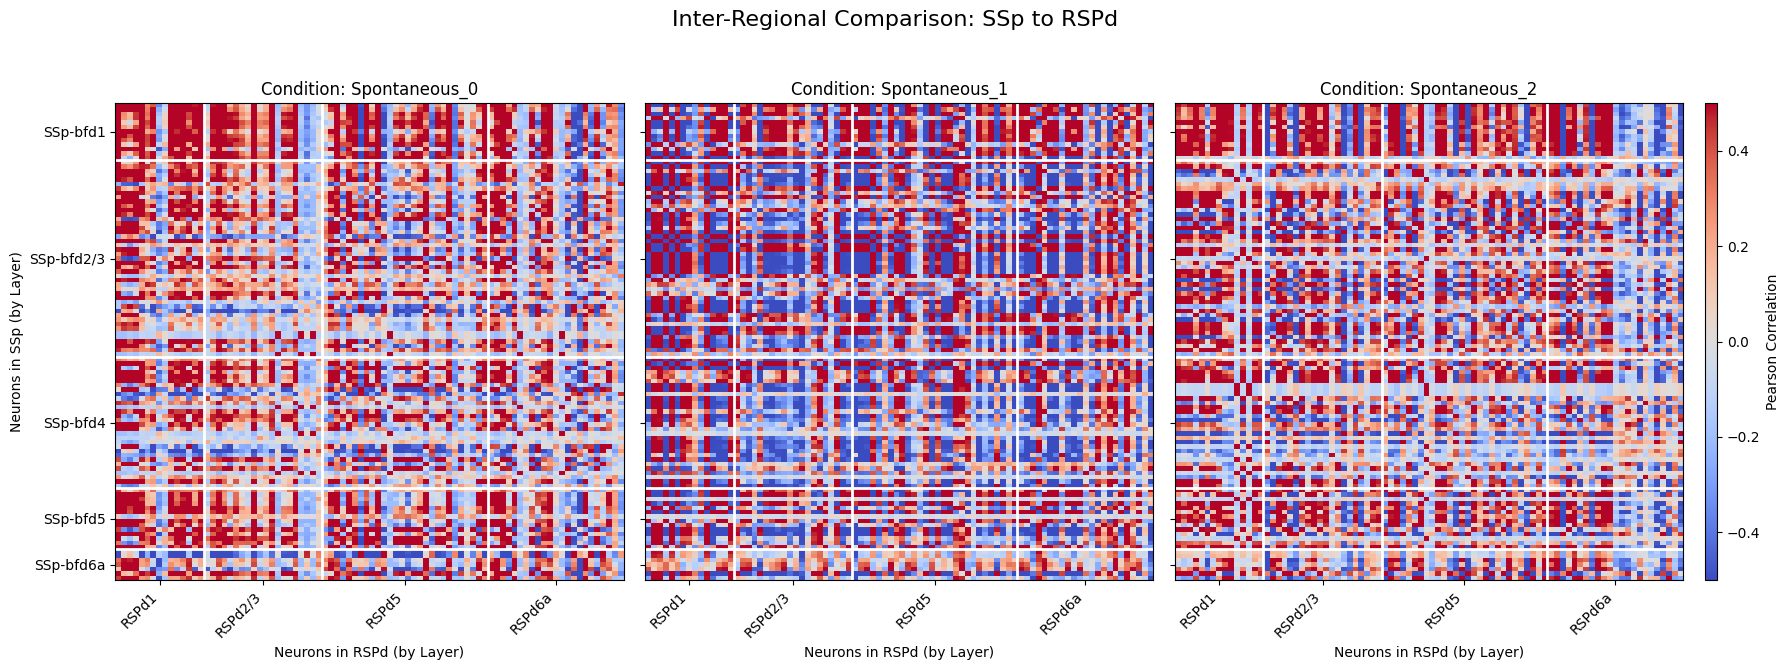

In [38]:
reg = 'SSp'
reg2 = 'RSPd'
region_labels = df_analysis.region.values
layer_labels = df_analysis.layer.values

matrices = [v for i,v in corr_map.items()]
epochs = [i for i,v in corr_map.items()]
mat_new = []
for i in matrices:
    mat, info_y, info_x = sset.calculate_inter_regional_correlation(region_labels,
                                                                                layer_labels, 
                                                                                i,
                                                                                reg,reg2)
    mat_new.append(mat)
plu.generate_inter_regional_comparison(mat_new, info_y, info_x, epochs,reg,reg2,
                                     vmin=-0.5, vmax=0.5, title='Inter-Regional Comparison')
plt.savefig(f'{save_path}/ssp_rspd_connectivity_spon_psy.svg')

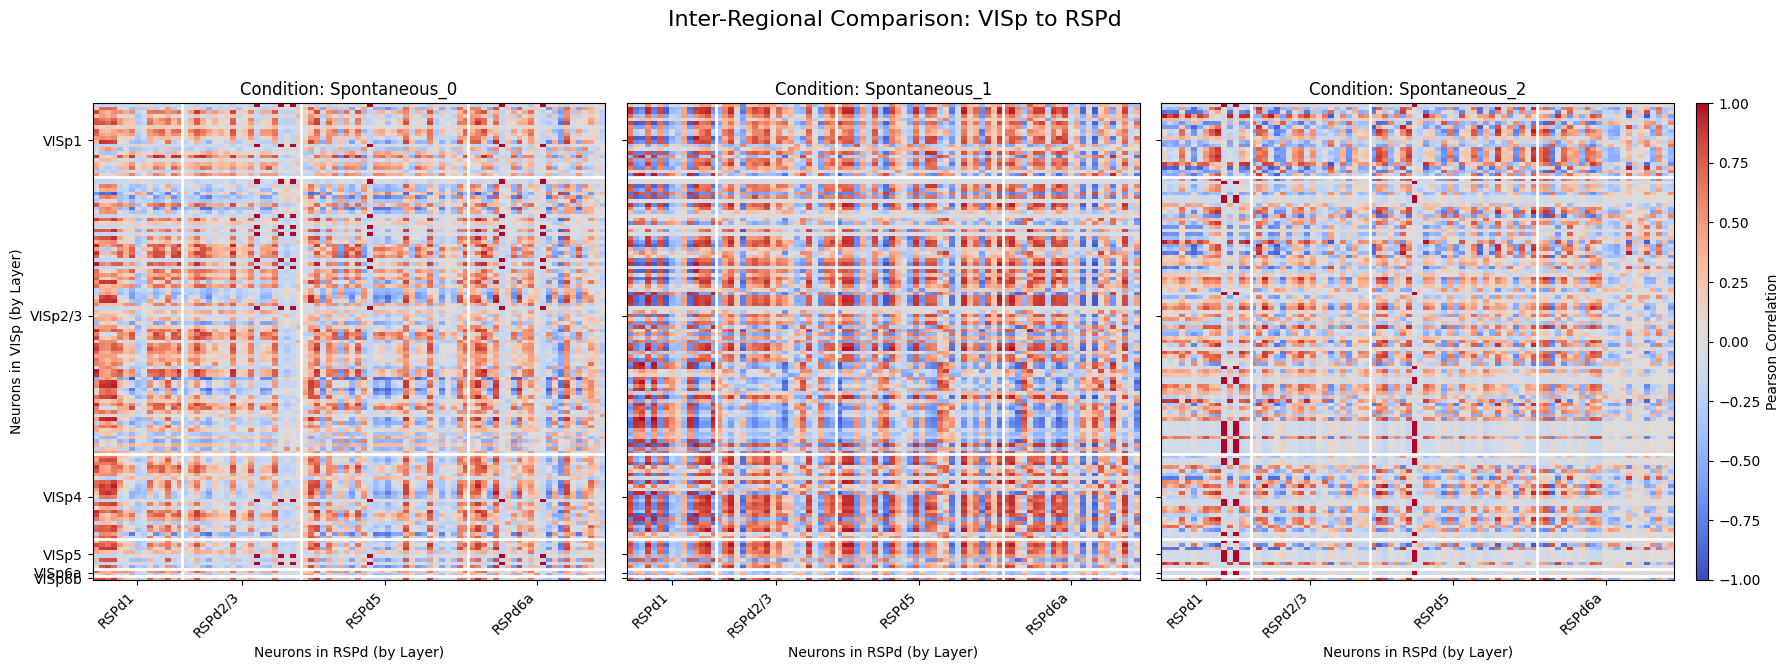

In [39]:
reg = 'VISp'
reg2 = 'RSPd'
region_labels = df_analysis.region.values
layer_labels = df_analysis.layer.values

matrices = [v for i,v in corr_map.items()]
epochs = [i for i,v in corr_map.items()]
mat_new = []
for i in matrices:
    mat, info_y, info_x = sset.calculate_inter_regional_correlation(region_labels,
                                                                                layer_labels, 
                                                                                i,
                                                                                reg,reg2)
    mat_new.append(mat)
plu.generate_inter_regional_comparison(mat_new, info_y, info_x, epochs,reg,reg2,
                                     vmin=-1, vmax=1, title='Inter-Regional Comparison')
plt.savefig(f'{save_path}/visp_rspd_connectivity_spon_psy.svg')

In [11]:
session_path = '/home/tony/Halluci-Nations/scratch/ecephys_717033_2024-06-05_12-36-57_nwb_2025-08-03_21-11-22'
df_path =os.path.join(session_path,'data.pkl')
df_analysis = pd.read_pickle(df_path)
corr_map_path = os.path.join(session_path,'spon_coor_maps.pkl')
corr_map = datrac.load_pickle(corr_map_path)

In [14]:
np.unique(region_labels)

array(['MOs', 'RSPd', 'SSp', 'VISp', 'cing', 'dhc', 'fp', 'or', 'root',
       'scwm'], dtype=object)

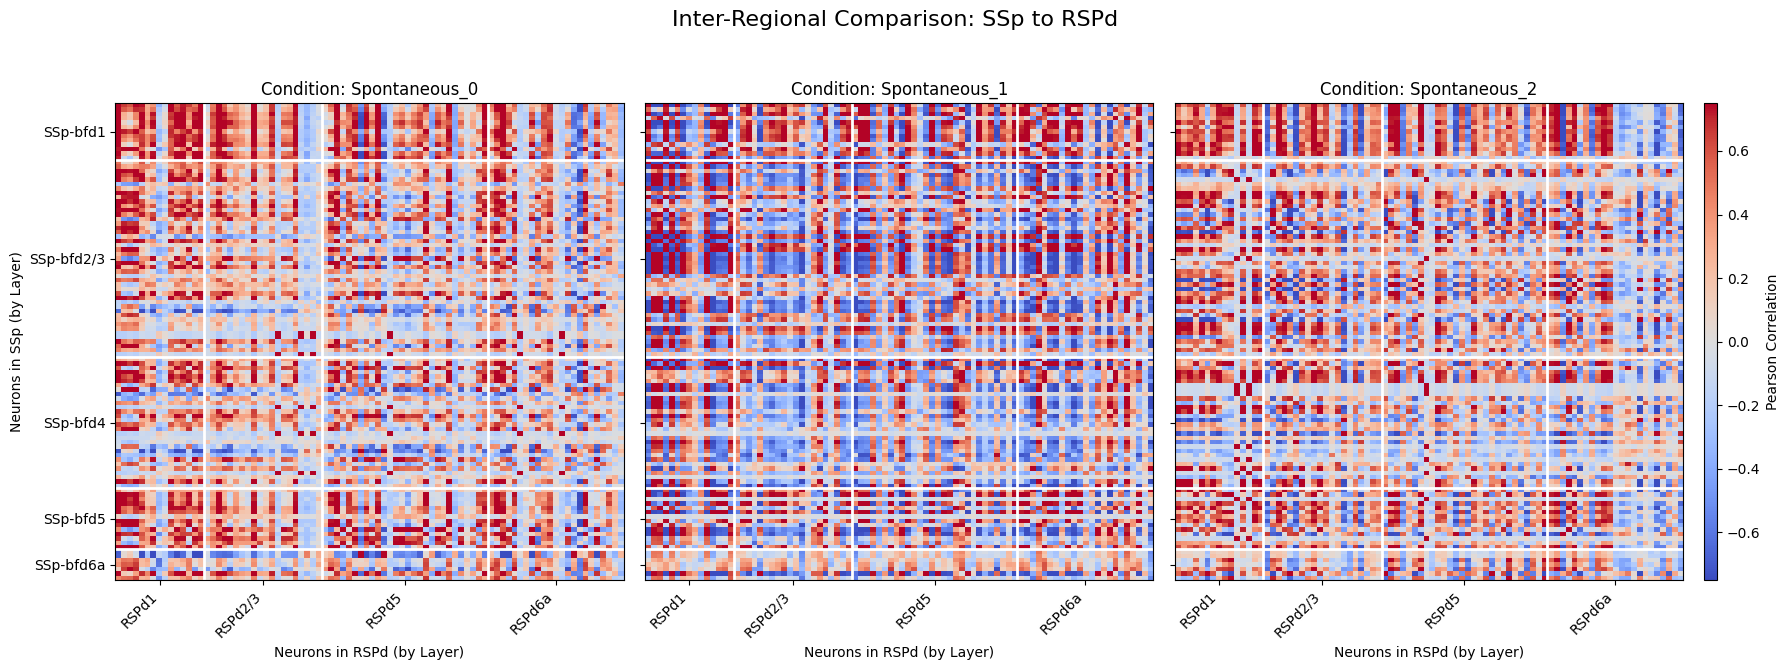

In [16]:
reg = 'SSp'
reg2 = 'RSPd'
region_labels = df_analysis.region.values
layer_labels = df_analysis.layer.values

matrices = [v for i,v in corr_map.items()]
epochs = [i for i,v in corr_map.items()]
mat_new = []
for i in matrices:
    mat, info_y, info_x = sset.calculate_inter_regional_correlation(region_labels,
                                                                                layer_labels, 
                                                                                i,
                                                                                reg,reg2)
    mat_new.append(mat)
plu.generate_inter_regional_comparison(mat_new, info_y, info_x, epochs,reg,reg2,
                                     vmin=-0.75, vmax=0.75, title='Inter-Regional Comparison')

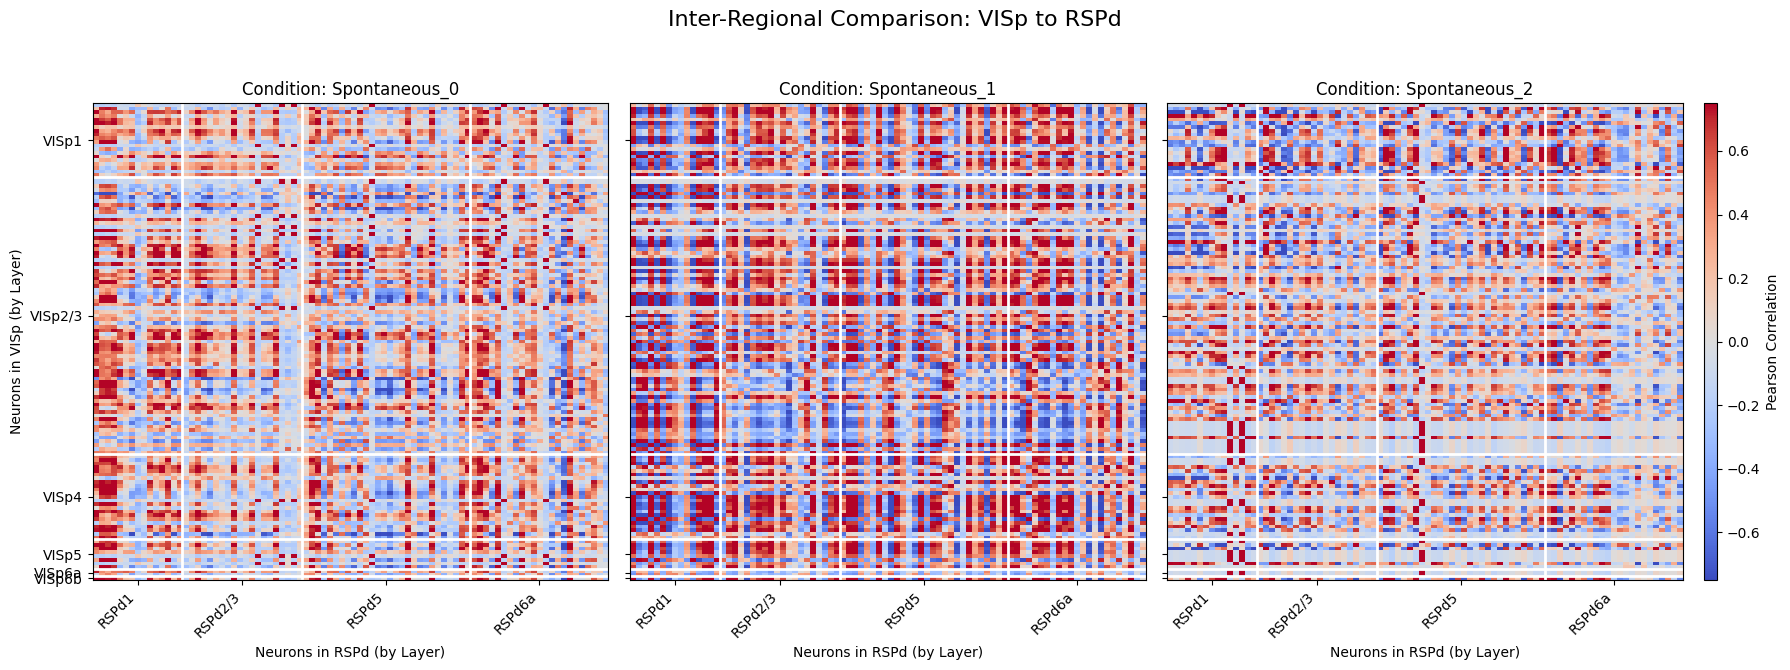

In [17]:
reg = 'VISp'
reg2 = 'RSPd'
region_labels = df_analysis.region.values
layer_labels = df_analysis.layer.values

matrices = [v for i,v in corr_map.items()]
epochs = [i for i,v in corr_map.items()]
mat_new = []
for i in matrices:
    mat, info_y, info_x = sset.calculate_inter_regional_correlation(region_labels,
                                                                                layer_labels, 
                                                                                i,
                                                                                reg,reg2)
    mat_new.append(mat)
plu.generate_inter_regional_comparison(mat_new, info_y, info_x, epochs,reg,reg2,
                                     vmin=-0.75, vmax=0.75, title='Inter-Regional Comparison')

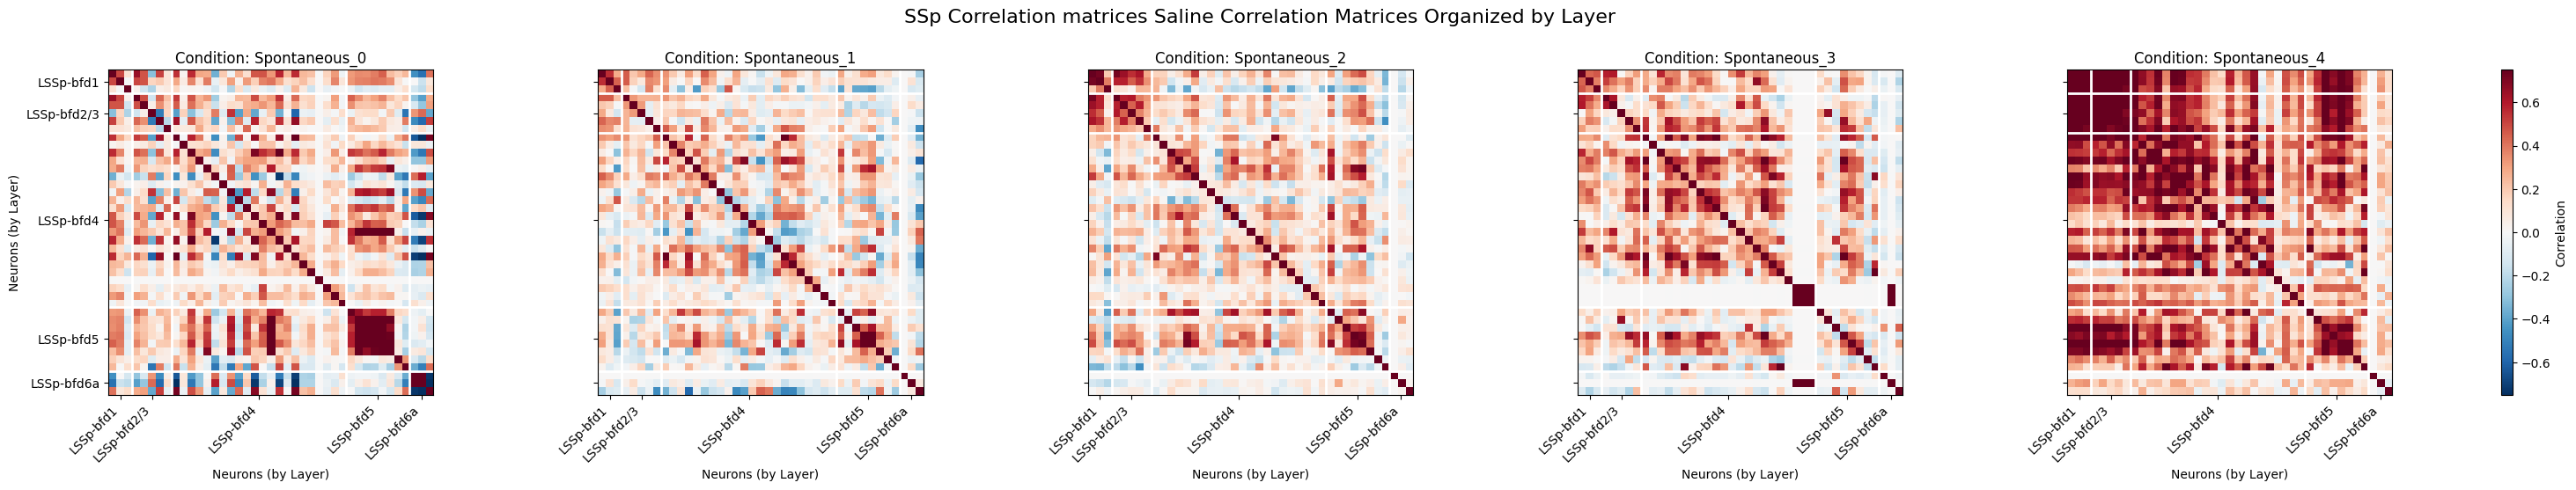

In [3]:
reg = 'SSp'
region_labels = df_analysis.region.values
layer_labels = df_analysis.layer.values

matrices = [v for i,v in corr_map.items()]
epochs = [i for i,v in corr_map.items()]
mat_new = []
for i in matrices:
    mat,unique_layers,layer_info = sset.subset_and_organize_corr_matrix(region_labels,layer_labels, i, reg)
    mat_new.append(mat)
unique_layers = sorted(layer_info.keys())
plu.generate_matrices_comparison(mat_new,layer_info,unique_layers,epochs,
                                 vmin=-0.75,vmax=0.75, title = reg+' Correlation matrices Saline')
plt.savefig('/home/tony/Halluci-Nations/results/saline_ssp.svg')

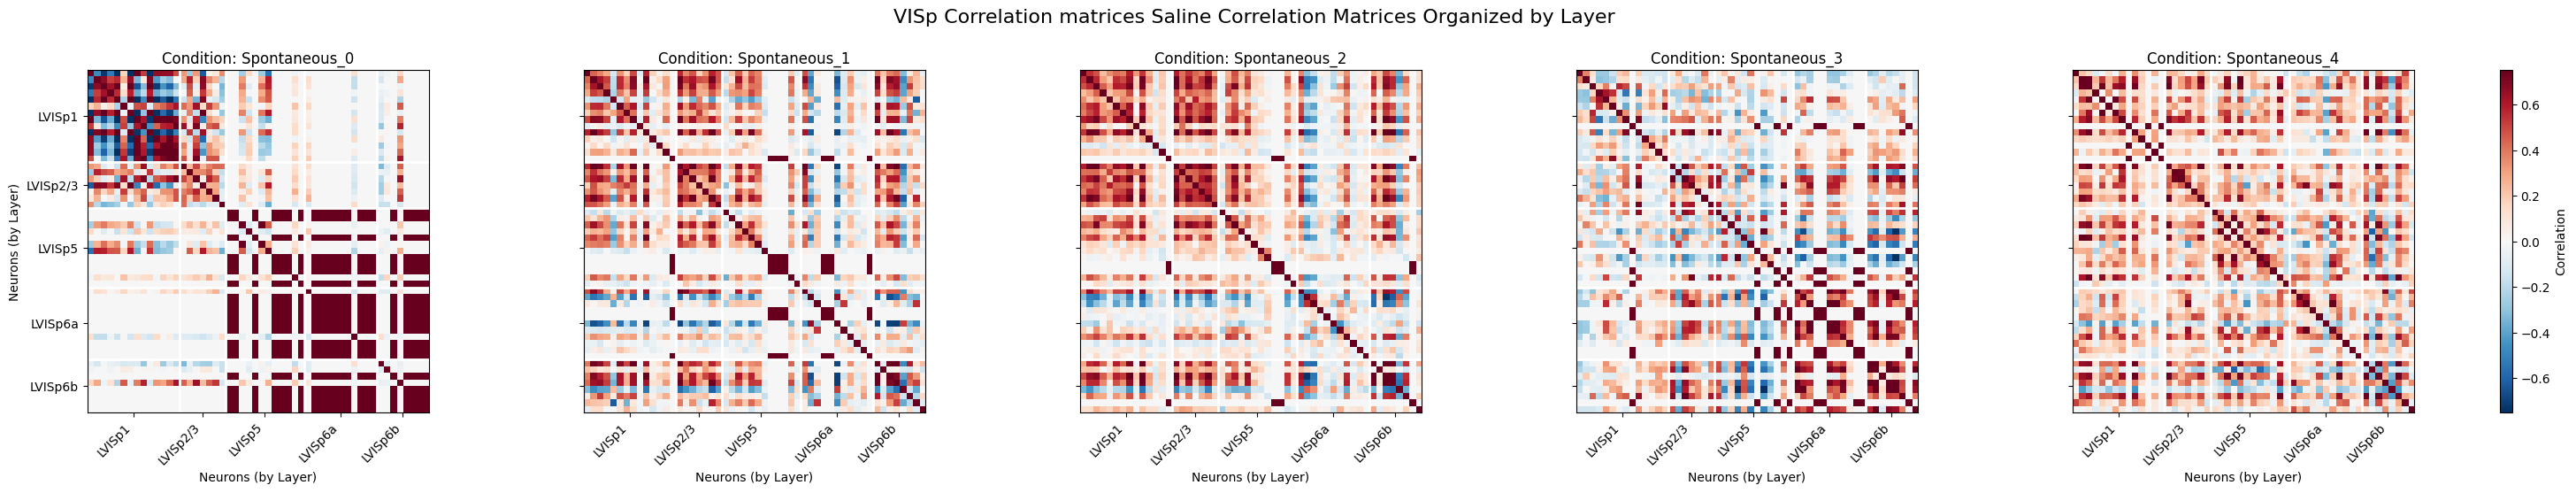

In [4]:
reg = 'VISp'
region_labels = df_analysis.region.values
layer_labels = df_analysis.layer.values

matrices = [v for i,v in corr_map.items()]
epochs = [i for i,v in corr_map.items()]
mat_new = []
for i in matrices:
    mat,unique_layers,layer_info = sset.subset_and_organize_corr_matrix(region_labels,layer_labels, i, reg)
    mat_new.append(mat)
unique_layers = sorted(layer_info.keys())
plu.generate_matrices_comparison(mat_new,layer_info,unique_layers,epochs,
                                 vmin=-0.75,vmax=0.75, title = reg+' Correlation matrices Saline')
plt.savefig('/home/tony/Halluci-Nations/results/saline_visp.svg')

In [14]:
session_path = '/home/tony/Halluci-Nations/scratch/ecephys_729461_2024-06-11_12-30-16_nwb_2025-08-03_21-11-22'
df_path =os.path.join(session_path,'data.pkl')
df_analysis = pd.read_pickle(df_path)
corr_map_path = os.path.join(session_path,'spon_coor_maps.pkl')
corr_map = datrac.load_pickle(corr_map_path)

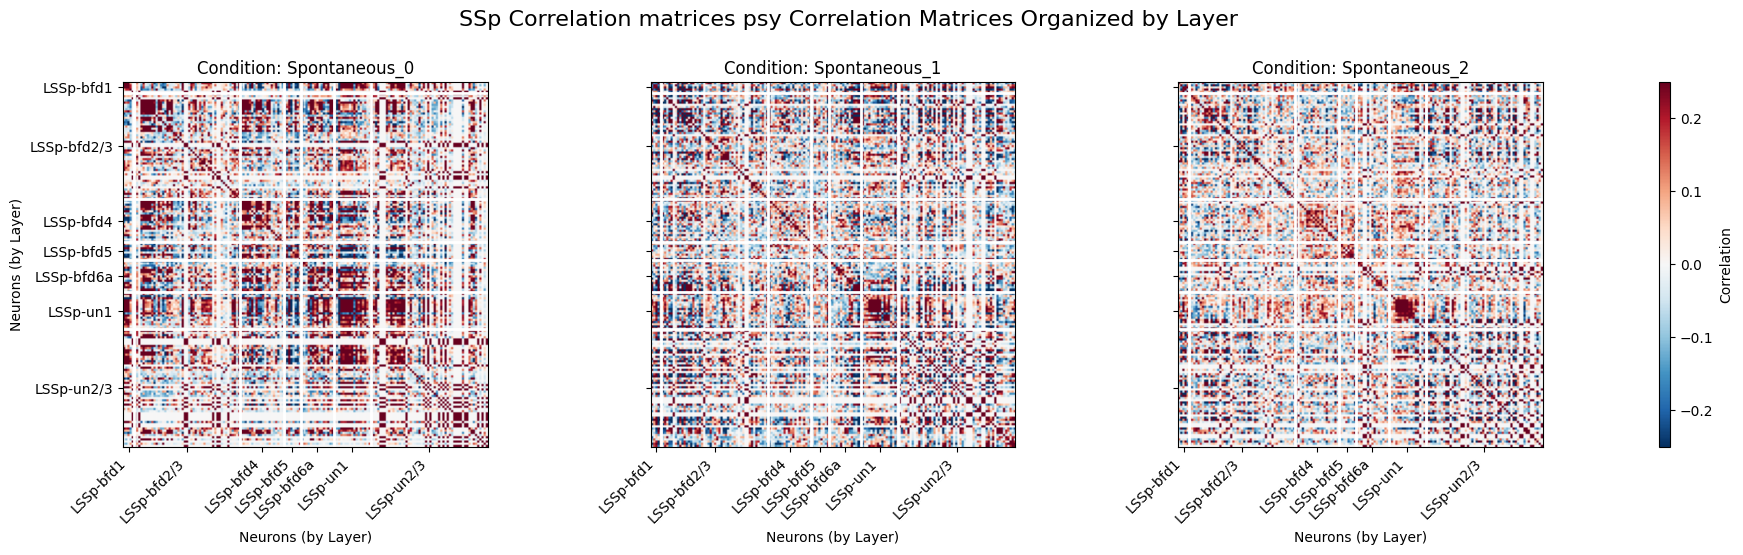

In [16]:
reg = 'SSp'
region_labels = df_analysis.region.values
layer_labels = df_analysis.layer.values

matrices = [v for i,v in corr_map.items()]
epochs = [i for i,v in corr_map.items()]
mat_new = []
for i in matrices:
    mat,unique_layers,layer_info = sset.subset_and_organize_corr_matrix(region_labels,layer_labels, i, reg)
    mat_new.append(mat)
unique_layers = sorted(layer_info.keys())
plu.generate_matrices_comparison(mat_new,layer_info,unique_layers,epochs,
                                 vmin=-0.25,vmax=0.25, title = reg+' Correlation matrices psy')
plt.savefig('/home/tony/Halluci-Nations/results/psy_ssp.svg')

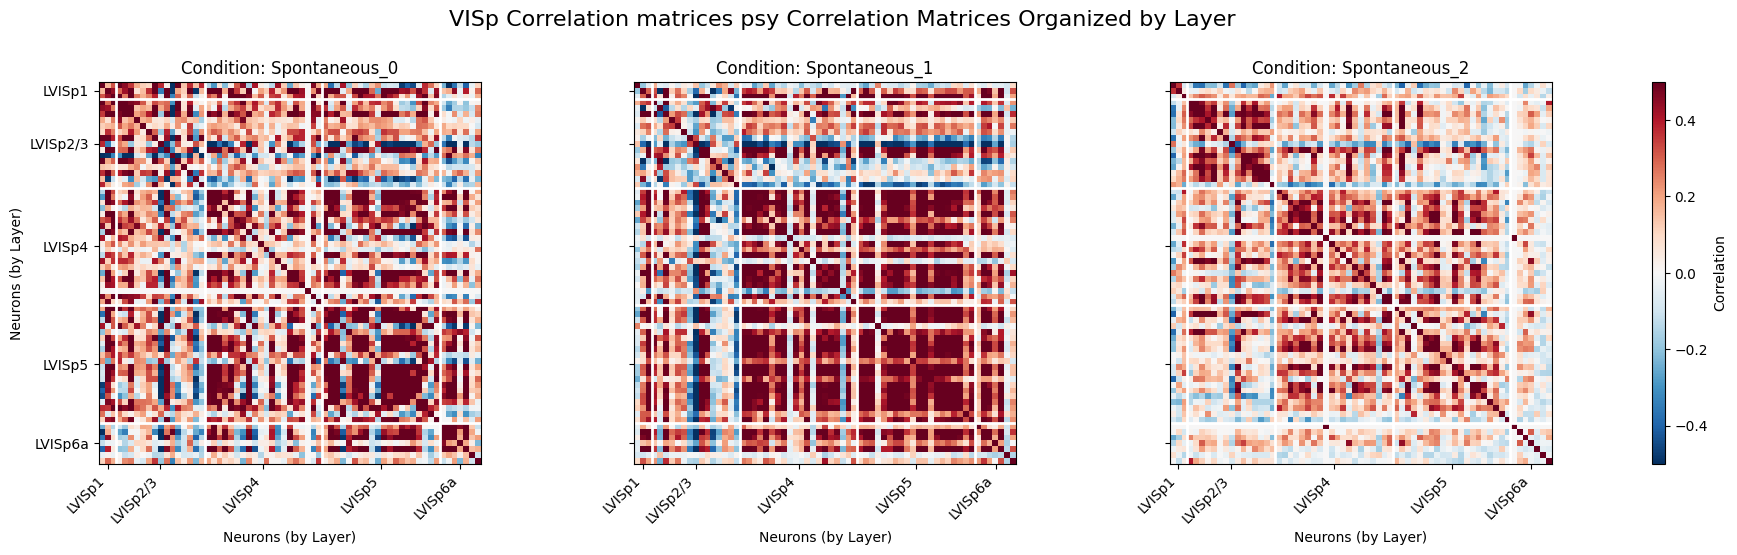

In [18]:
reg = 'VISp'
region_labels = df_analysis.region.values
layer_labels = df_analysis.layer.values

matrices = [v for i,v in corr_map.items()]
epochs = [i for i,v in corr_map.items()]
mat_new = []
for i in matrices:
    mat,unique_layers,layer_info = sset.subset_and_organize_corr_matrix(region_labels,layer_labels, i, reg)
    mat_new.append(mat)
unique_layers = sorted(layer_info.keys())
plu.generate_matrices_comparison(mat_new,layer_info,unique_layers,epochs,
                                 vmin=-0.5,vmax=0.5, title = reg+' Correlation matrices psy')
plt.savefig('/home/tony/Halluci-Nations/results/psy_visp.svg')

In [ ]:
data_dic